In [1]:
import pandas as pd
import pyBigWig
import actc_seq
import tqdm
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import Counter
from pylab import rcParams
from itertools import product


# import ATACseq overlap dataset

In [2]:
atac_out = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2024/ATAC/'
chrtest_MCF7 = pd.read_csv(atac_out + 'ATAC_MCF7.csv')
chrtest_MCF7 = chrtest_MCF7[abs(chrtest_MCF7['sgRNA \'Cut\' Site TSS Offset']) <= 5000]

ess_noness = pd.read_csv('/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2022/essential_nonessential/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()


In [3]:
# make a dict of possible datasaets
DataSet = chrtest_MCF7.DataSet.unique()
Domain = chrtest_MCF7.Domain.unique()
Cellline = chrtest_MCF7.condition.unique()
DatasetCombo = list(product(DataSet,Domain,Cellline))
def DatasetDictFunction(ATACdf):
    # takes in ATACseq DatasetCombo, i assign 
    # for each unique comb in a key and dataset subset using the unique value is the value
    # return a dic
    DatasetDict = dict()
    for combo in DatasetCombo:
        subset_data = ATACdf[(ATACdf.DataSet == combo[0]) 
                     & (ATACdf.Domain == combo[1]) 
                     & (ATACdf.condition == combo[2])]
        if len(subset_data) == 0:
            pass
        else:
            if combo[0] == 'InHouse':
                subset_data_ess = subset_data[subset_data['Target Gene Symbol'].isin(EssGene)]
                DatasetDict[combo] = subset_data_ess

            else:
                DatasetDict[combo] = subset_data
    return DatasetDict

In [4]:
DatasetDictMCF7 = DatasetDictFunction(chrtest_MCF7)

# ATAC MCF7

### Pval_ATAC_InHouseA549Kox1

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


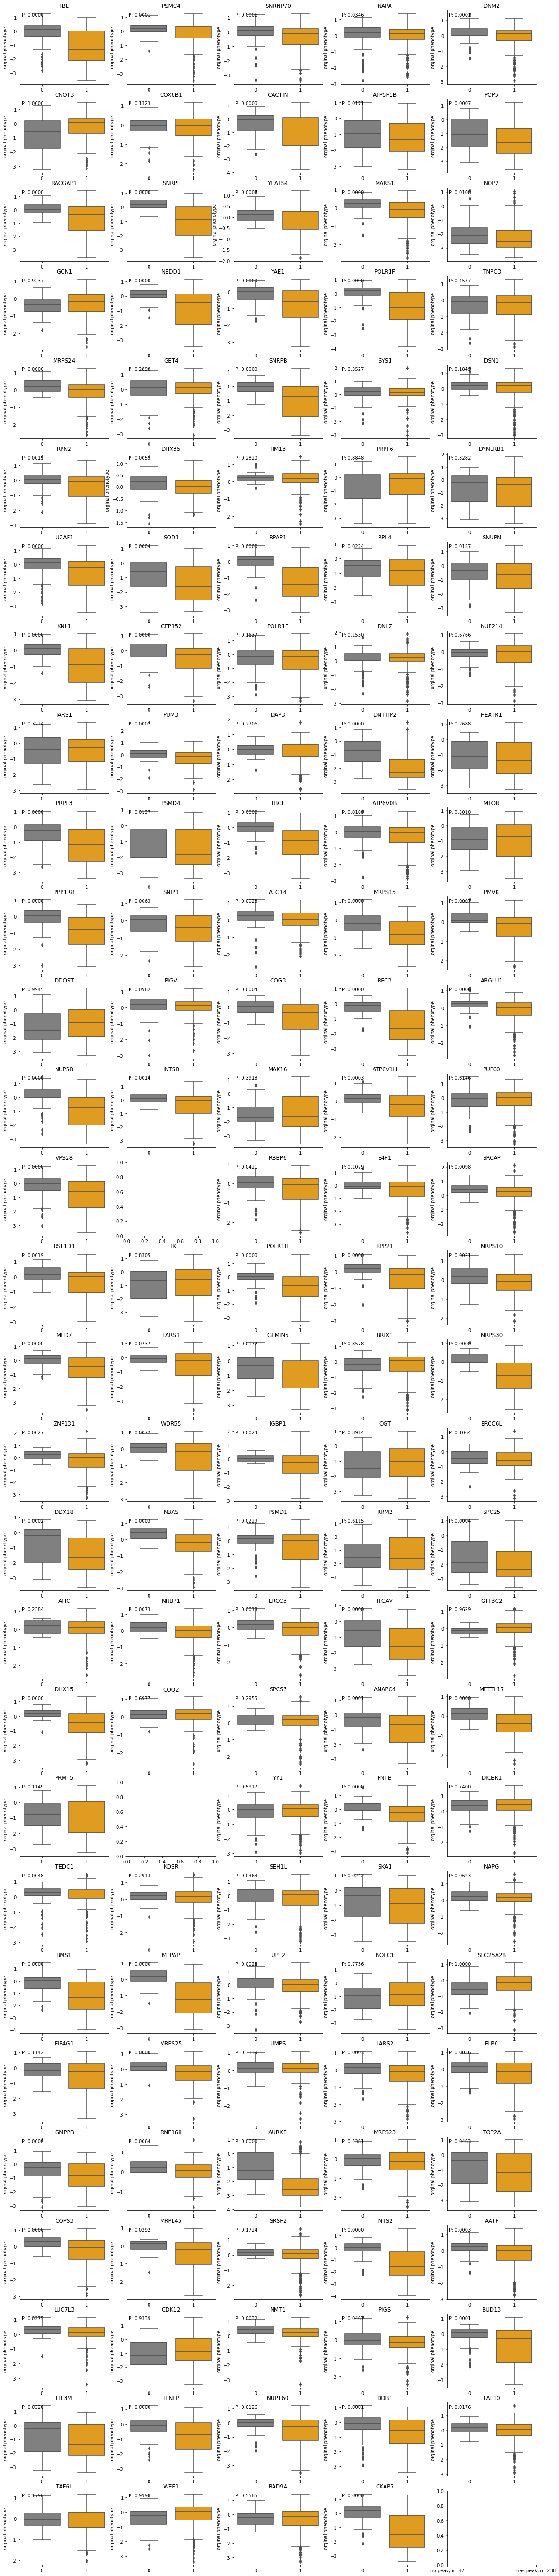

In [5]:
Pval_ATACMCF7_InHouseA549Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictMCF7[('InHouse', 'Kox1', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


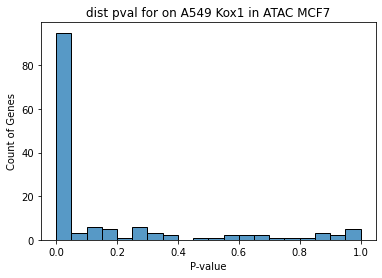

In [6]:
Pval_ATACMCF7_InHouseA549Kox1_df = pd.DataFrame(Pval_ATACMCF7_InHouseA549Kox1.items())
Pval_ATACMCF7_InHouseA549Kox1_df['cell'] = 'InHouseA549Kox1'
actc_seq.pval_agg(Pval_ATACMCF7_InHouseA549Kox1_df[1], 'dist pval for on A549 Kox1 in ATAC MCF7')

### ATAC_InHouseA549Zim3

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


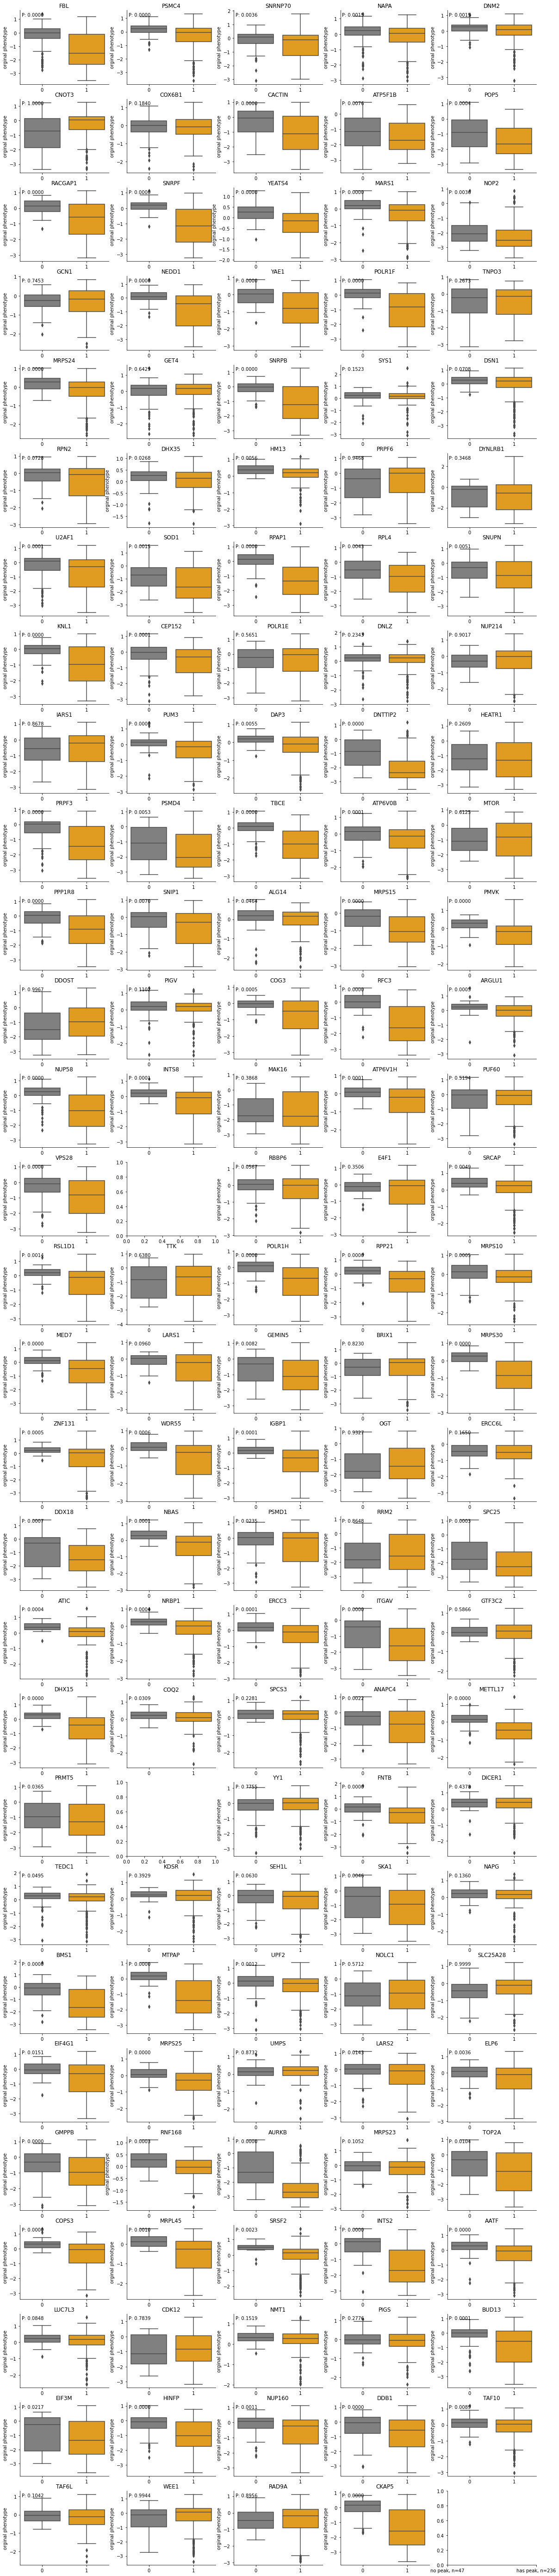

In [7]:
Pval_ATACMCF7_InHouseA549Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictMCF7[('InHouse', 'Zim3', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


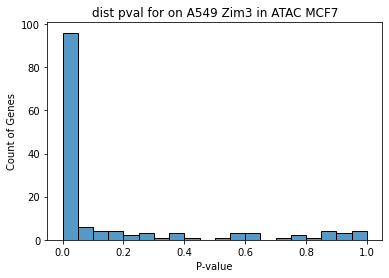

In [8]:
Pval_ATACMCF7_InHouseA549Zim3_df = pd.DataFrame(Pval_ATACMCF7_InHouseA549Zim3.items())
Pval_ATACMCF7_InHouseA549Zim3_df['cell'] = 'InHouseA549Zim3'
actc_seq.pval_agg(Pval_ATACMCF7_InHouseA549Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC MCF7')

### InHouseHCT116Zim3

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


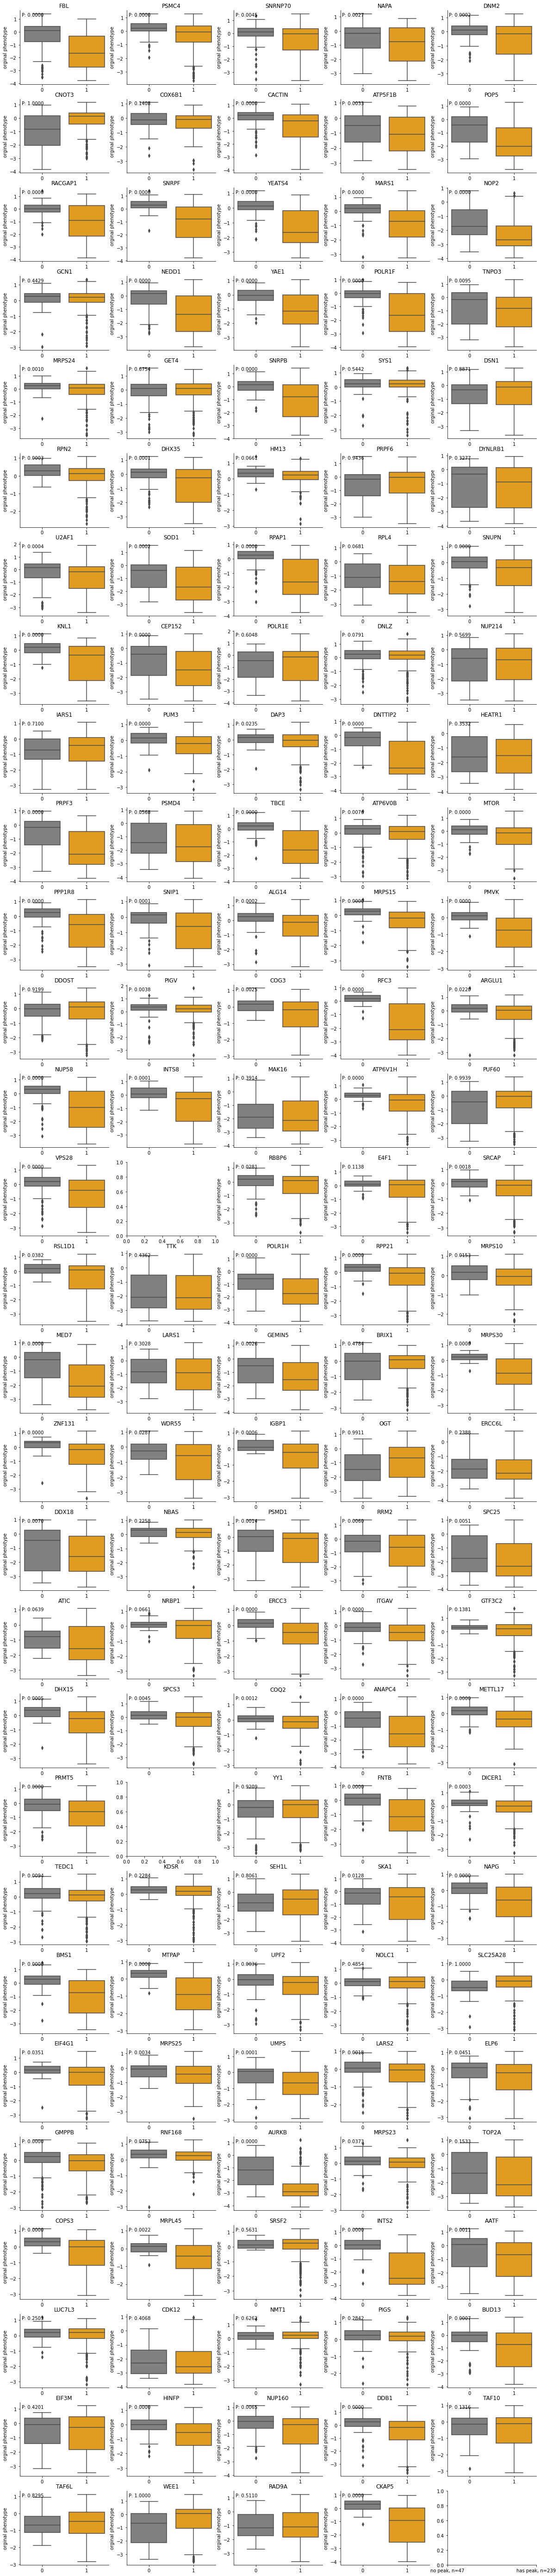

In [9]:
Pval_ATACMCF7_InHouseHCT116Zim3= actc_seq.pvalue_overlap_comparison_boxplot(
    DatasetDictMCF7[('InHouse', 'Zim3', 'HCT116')], 
    'orginal phenotype', 
    gene_col = 'Target Gene Symbol', 
    test_direction = 'no peak > peak' )


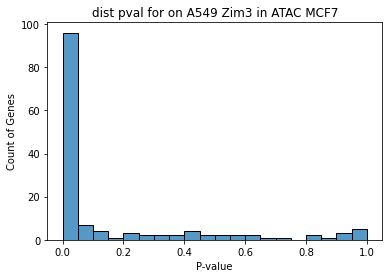

In [10]:
Pval_ATACMCF7_InHouseHCT116Zim3_df = pd.DataFrame(Pval_ATACMCF7_InHouseHCT116Zim3.items())
Pval_ATACMCF7_InHouseHCT116Zim3_df['cell'] = 'InHouseHCT116Zim3'
actc_seq.pval_agg(Pval_ATACMCF7_InHouseHCT116Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC MCF7')

### InHouseHCT116Kox1

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


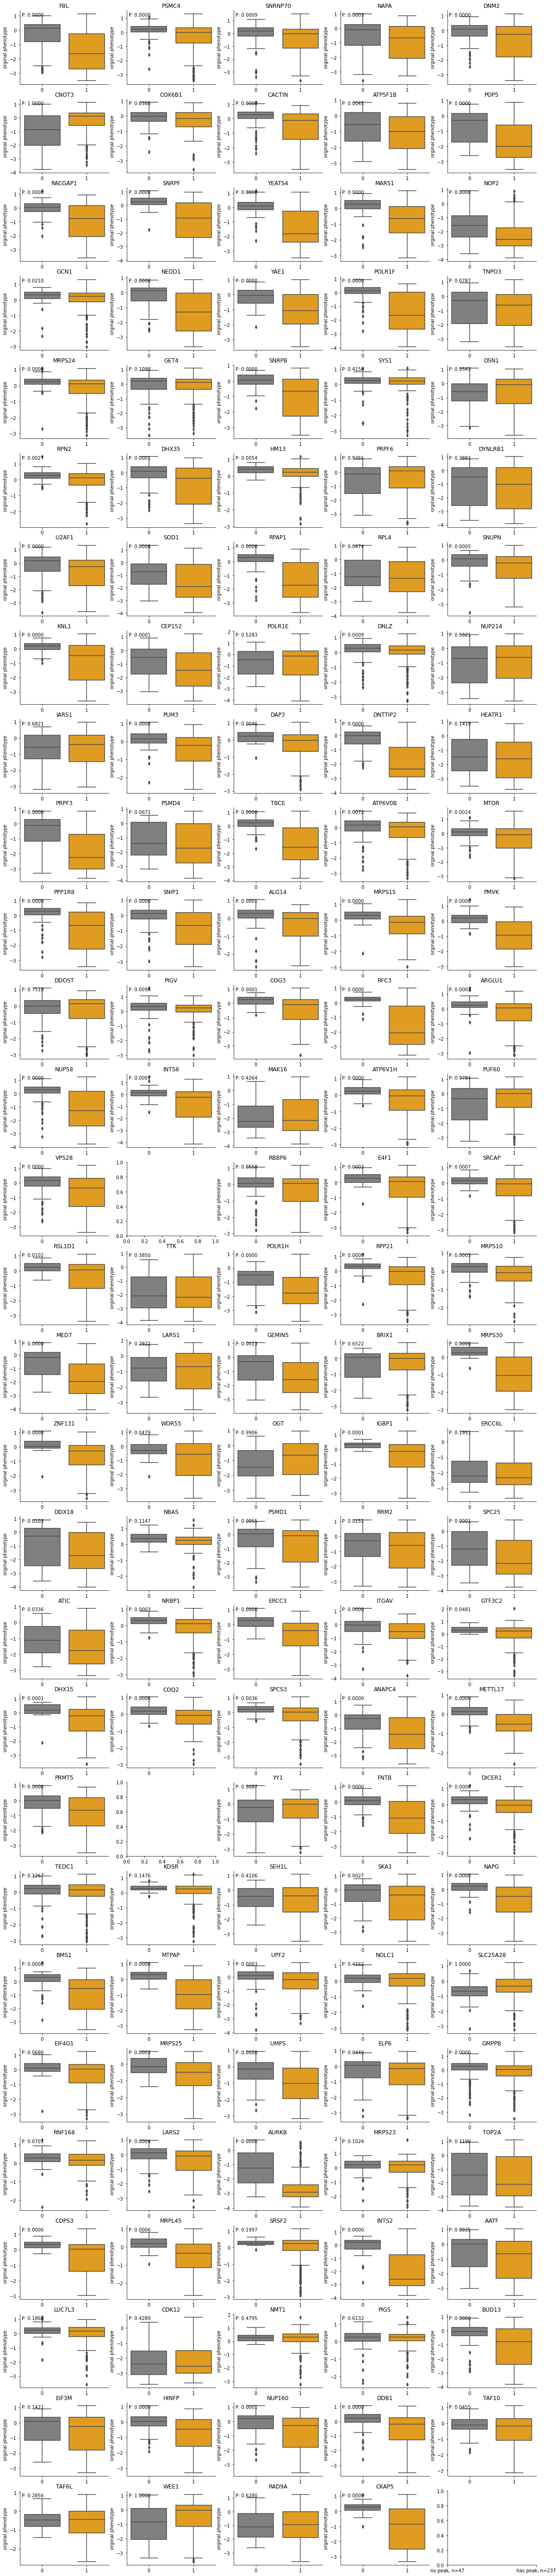

In [11]:
Pval_ATACMCF7_InHouseHCT116Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictMCF7[('InHouse', 'Kox1', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


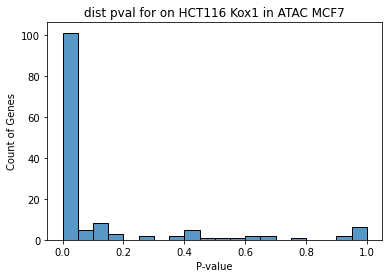

In [12]:
Pval_ATACMCF7_InHouseHCT116Kox1_df = pd.DataFrame(Pval_ATACMCF7_InHouseHCT116Kox1.items())
Pval_ATACMCF7_InHouseHCT116Kox1_df['cell'] = 'InHouseHCT116Kox1'
actc_seq.pval_agg(Pval_ATACMCF7_InHouseHCT116Kox1_df[1], 'dist pval for on HCT116 Kox1 in ATAC MCF7')

### NunezK562Kox1

MRPS35: Sample size in overlap or nonoverlap < 10
SNRNP35: Sample size in overlap or nonoverlap < 10
NIP7: Sample size in overlap or nonoverlap < 10
SNW1: Sample size in overlap or nonoverlap < 10
DDX21: Sample size in overlap or nonoverlap < 10
DBR1: Sample size in overlap or nonoverlap < 10
NLE1: Sample size in overlap or nonoverlap < 10


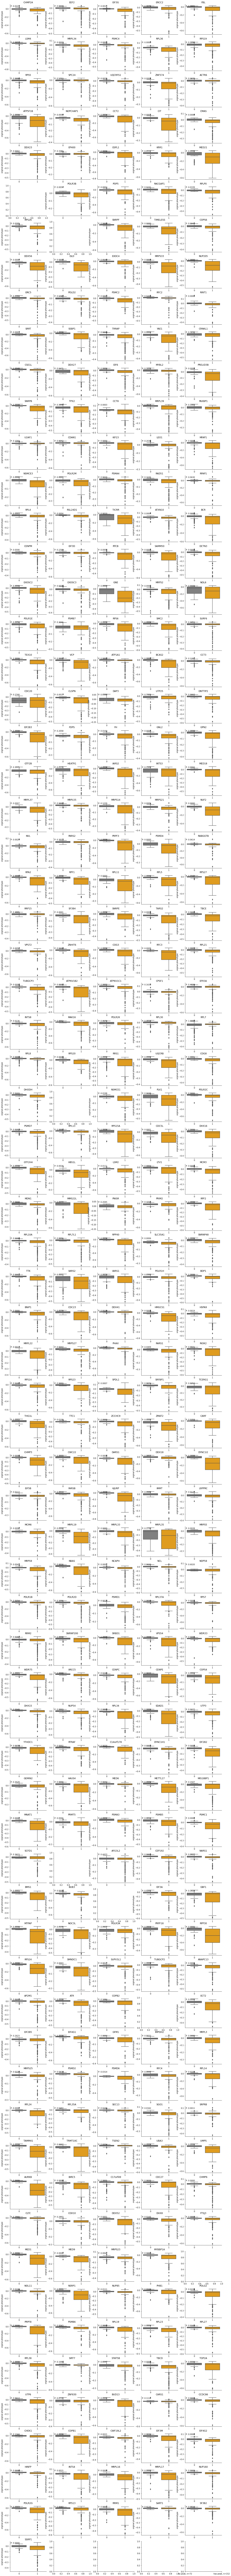

In [13]:
Pval_ATACMCF7_NunezK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictMCF7[('Nunze', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


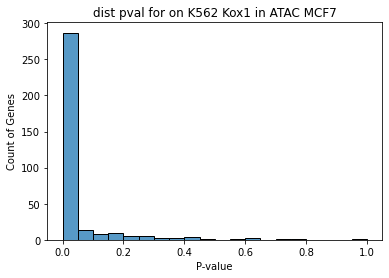

In [14]:
Pval_ATACMCF7_NunezK562Kox1_df = pd.DataFrame(Pval_ATACMCF7_NunezK562Kox1.items())
Pval_ATACMCF7_NunezK562Kox1_df['cell'] = 'NunezK562Kox1'
actc_seq.pval_agg(Pval_ATACMCF7_NunezK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC MCF7')

### GilbertK562Kox1

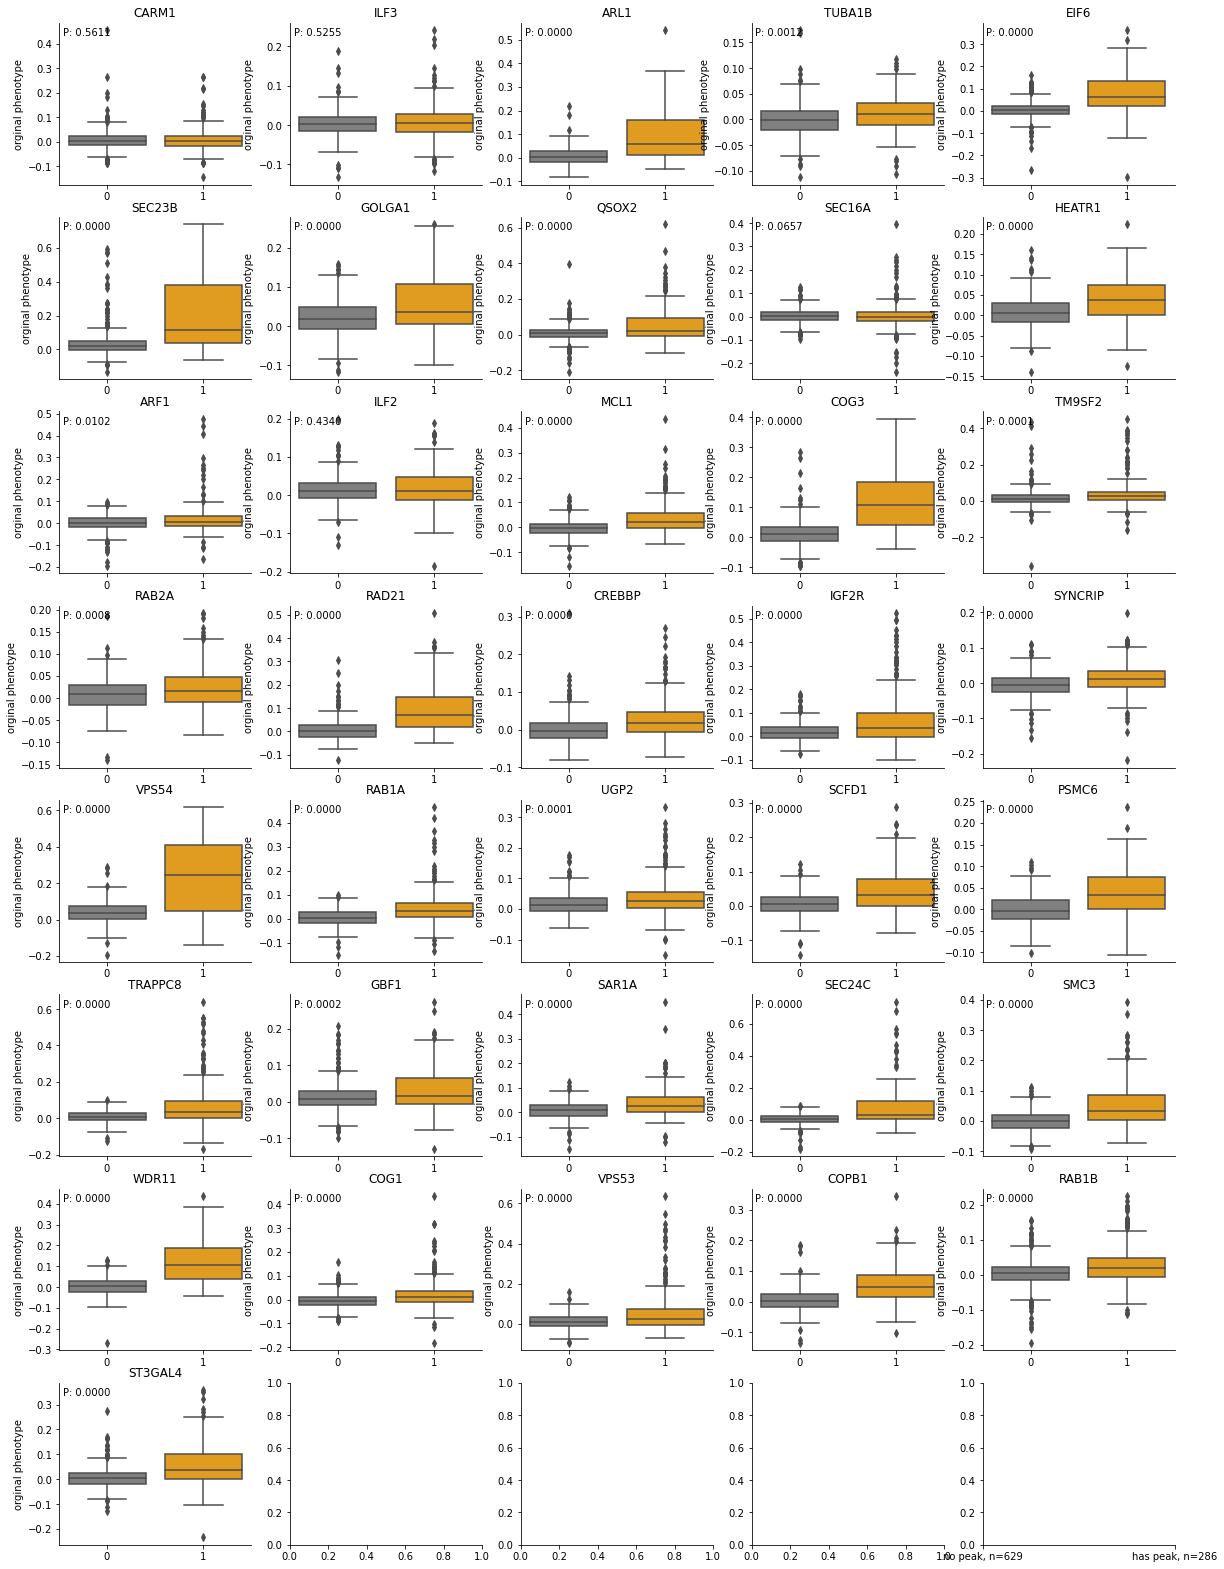

In [15]:
Pval_ATACMCF7_GilbertK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictMCF7[('Gilbert', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'two-sided' )


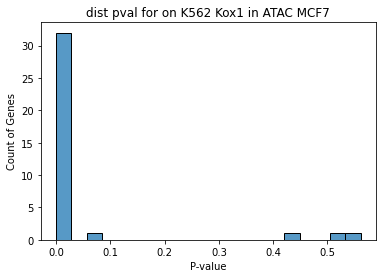

In [16]:
Pval_ATACMCF7_GilbertK562Kox1_df = pd.DataFrame(Pval_ATACMCF7_GilbertK562Kox1.items())
Pval_ATACMCF7_GilbertK562Kox1_df['cell'] = 'GilbertK562Kox1'
actc_seq.pval_agg(Pval_ATACMCF7_GilbertK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC MCF7')

In [17]:
total_pval = pd.concat([Pval_ATACMCF7_InHouseA549Kox1_df,
           Pval_ATACMCF7_InHouseHCT116Kox1_df,
           Pval_ATACMCF7_InHouseHCT116Zim3_df,
           Pval_ATACMCF7_InHouseA549Zim3_df,
           Pval_ATACMCF7_GilbertK562Kox1_df,
           Pval_ATACMCF7_NunezK562Kox1_df])

total_pval.columns = ['Gene', 'Pval', 'DataSetID']
out_path = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2024/ATAC/Pval/'
total_pval.to_csv(out_path+'MCF7Pval_v2.csv', index = False)